**Shopify Data Challeng**

**On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of 3145.13 dollar. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.** 


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading dataset
shopify_df= pd.read_excel("./Downloads/2019 Winter Data Science Intern Challenge Data Set.xlsx")

In [3]:
# checking out the dataset
shopify_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


**Exploratorary Data Analysis**

*Exploring information and some statistics of the dataset*

In [4]:
shopify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [5]:
shopify_df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
shop_id,5000.0,50.0788,29.006118,1.0,24.00,50.0,75.00,100.0
user_id,5000.0,849.0924,87.798982,607.0,775.00,849.0,925.00,999.0
order_amount,5000.0,3145.1280,41282.539349,90.0,163.00,284.0,390.00,704000.0
total_items,5000.0,8.7872,116.320320,1.0,1.00,2.0,3.00,2000.0


In [6]:
#A closer look at the order_amount column to better understand the data. 
shopify_df.order_amount.describe().T

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

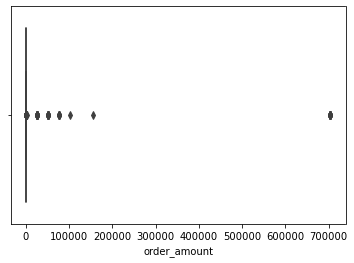

In [7]:
#Utilizing data visualization to better understand the data.
sns.boxplot(x=shopify_df['order_amount']);


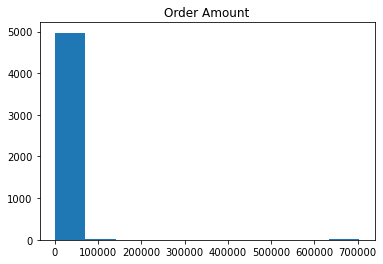

In [8]:
plt.hist(x=shopify_df['order_amount'])
plt.title('Order Amount');

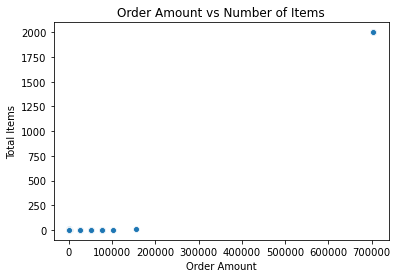

In [9]:
ax= sns.scatterplot(x="order_amount", y="total_items", data=shopify_df)
ax.set(xlabel='Order Amount', ylabel='Total Items')
ax.set_title('Order Amount vs Number of Items');


*The boxplot suggests there are a number of unusual orders in terms of total amount, especially, one cluster of orders at 700,000 dollars.*

*Also the histogram and scatter plot suggest that the 700,000 dollars cluster belongs to orders/order with 2000 items.*

*Besides that, they show that there are a number of unusually high amount of orders with a limited number of items sold meaning that the price of each item sold is much higher that the expected average price of each item sold on Shopify during the month.*  

**Exploring the outlier data/ finding out why the average of AOV is higher than expected**

*In this question, Average has been used in order to calculate the AOV. However, by looking at the numbers and plots above, we can understand that there is a huge range between minimum of 90 and maximum of 704,000. Also, by looking at standard deviation which shows how big the variability of the dataset is. To sum up, considering the data set size of 5,000 and all the other numbers (minimum, first quartile, median, third quartile and maximum), the conclusion is that there are some outliers in the datasets (based on plots above, close to 650,000) that are incredebly bigger than the average numbers in the dataset. These are outliers.*

*Let's explore the Outliers and find out what is driving the average aov UP.*

In [10]:
total_items_frequency=shopify_df.groupby(by=['total_items']).count()
total_items_frequency['Frequency']=total_items_frequency['order_id']
total_items_frequency[['Frequency']]

,Frequency
total_items,
1,1830
2,1832
3,941
4,293
5,77
6,9
8,1
2000,17


*Table below, shows the orders with a total number of items equal to 2000*


In [11]:
shop_42=shopify_df[shopify_df['total_items']==2000]
shop_42

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


*Table above shows that the same user ID (607) placed 17 bulk orders of 2000 items at the same store ID 42 in a month which effects the average AOV since most orders include less than 5 items*

*Now let’s find out more about those orders with a high amount but low number of items*

In [19]:
Sale_Per_Shop=shopify_df.groupby('shop_id').sum()[['order_amount','total_items']]
Sale_Per_Shop['avg_item_price']=Sale_Per_Shop['order_amount']/Sale_Per_Shop['total_items']
Sale_Per_Shop.sort_values(by=['avg_item_price'], ascending=False)

,order_amount,total_items,avg_item_price
shop_id,,,
78,2263800,88,25725.0
42,11990176,34063,352.0
12,18693,93,201.0
89,23128,118,196.0
99,18330,94,195.0
...,...,...,...
53,14560,130,112.0
100,8547,77,111.0
32,7979,79,101.0


*Now we only look at orders placed at shop 78 since the average price item sold is much higher than any other store.*

In [20]:
shop_78=shopify_df[shopify_df['shop_id']==78]
shop_78

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834
490,491,78,936,51450,2,debit,2017-03-26 17:08:18.911
493,494,78,983,51450,2,cash,2017-03-16 21:39:35.400
511,512,78,967,51450,2,cash,2017-03-09 07:23:13.640
617,618,78,760,51450,2,cash,2017-03-18 11:18:41.848
691,692,78,878,154350,6,debit,2017-03-27 22:51:43.203
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:44.830
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:25.551
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:19.843


*Store 42 and 78, one due to considerable number of high number of items ordered and the other one due to considerably high price of each item are affecting the average order value.*

**Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?**


*Minoo's Answer : Based on my analysis, this dataset has some outliers. The above analysis showed that mainly the two following reasons affected the average order values:*

*1- A shopper made frequent bulk orders at the same store.
2- A store sold considerably expensive items.*

*There are three suggested solutions to address this issue:
1- I either suggest to use the median amount of 284 dollar instead of the mean as the AOV which is a more robust measure in the central tendecy.*

*2- Another solution (below) is to normalize the data by considering the average item amount (358 dollar) taking into account the number of pairs purchased in all the transactions.*

*3- Since User ID 607 made 17 bulk orders (2000 items) and those are the only bulk orders out of 5,000 orders that might not be expected in normal shopping experience. These 17 records can be excluded from the dataset. Additionally, shop ID 78 is selling items at prices much higher than any other Shopify store. Thus, the 64 records showing purchase of this shop can be excluded from the dataset to only use shops with prices within the expected price range.*

In [26]:
#Solution number 2= Let's find the metric by summing all order amounts and divide it by the total number of items in each order
#By using the average for each order, we will have the average price of sneakers selling by all shopify store. 
avgerage_sold_sneaker_value=shopify_df['order_amount'].sum()/shopify_df['total_items'].sum()

In [24]:
#As below calculated, the mean which is 388 can be also consider as the Average Item Value.
avgerage_sold_sneaker_value

357.92152221412965

**Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.**



**a. How many orders were shipped by Speedy Express in total?**

SELECT COUNT(*) AS NO_OF_SPEEDY_EXPRESS_ORDERS

FROM orders o JOIN shippers s ON o.shipperid=s.shipperid

WHERE shippername='Speedy Express';

Minoo's Answer= 54

**b. What is the last name of the employee with the most orders?**

SELECT COUNT(*) AS Count_, e.LastName

FROM Orders AS o

JOIN Employees AS e

ON o.EmployeeID= e.EmployeeID

GROUP BY e.LastName

ORDER BY count_ DESC

LIMIT 1;

Minoo's Answer= Peacock with 40 orders

**c. What product was ordered the most by customers in Germany?**

SELECT SUM(od.Quantity) AS SUM, p.ProductName 

FROM orderdetails od JOIN orders o ON od.orderid=o.orderid

JOIN products p ON od.productid = p.productid

JOIN customers c ON o.customerid=c.customerid

WHERE c.country='Germany'

GROUP BY p.productid

ORDER BY SUM(od.Quantity) DESC

LIMIT 1

Minoo's Answer= Boston Crab Meat with 160 total orders